# import Libraries





In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Datasets

In [3]:
# Read the CSV file from Google Drive
basic_dataset = pd.read_csv ('/content/drive/MyDrive/NS/Dataset 1 - Basis Execution Data Oct-Dec_22.csv' , sep = ";" , encoding='latin-1')
second_dataset = pd.read_csv('/content/drive/MyDrive/NS/Dataset 2 - Rolling Stock Execution Oct - Dec_22.csv', sep = ";")
third_dataset = pd.read_csv('/content/drive/MyDrive/NS/Dataset 3a - Set 3 + Driver Change Included - Oct - Dec_22.csv', sep = ";")

### 1. subset the dataset with desired columns

In [4]:
desired_columns_3 = ['SL_RIJRICHTINGKERING_IND','SL_OMNUMMERING','SL_DRGLPT','SL_TREINNR','SL_VERKEERSDATUM','SL_BASIC_UITVTIJD_VERTREK'  , 'SL_MAT_LENGTE' , 'Wisselmachinist', 'SL_OPLANTIJD_VERTREK' ]
df_3 = third_dataset[desired_columns_3]
df_3

,SL_RIJRICHTINGKERING_IND,SL_OMNUMMERING,SL_DRGLPT,SL_TREINNR,SL_VERKEERSDATUM,SL_BASIC_UITVTIJD_VERTREK,SL_MAT_LENGTE,Wisselmachinist,SL_OPLANTIJD_VERTREK
0,1,80447,Ut,516,01OCT2022,01OCT22:07:21:26,161.0,0.0,01OCT22:07:18:00
1,0,NaN,Gd,516,01OCT2022,01OCT22:07:39:54,161.0,NaN,01OCT22:07:37:00
2,0,NaN,Rta,516,01OCT2022,01OCT22:07:49:44,161.0,NaN,01OCT22:07:46:00
3,0,407719,Ut,519,01OCT2022,01OCT22:06:52:18,161.0,NaN,01OCT22:06:49:00
4,0,NaN,Amf,519,01OCT2022,01OCT22:07:15:39,161.0,NaN,01OCT22:07:04:00
...,...,...,...,...,...,...,...,...,...
2088099,1,28784,Brn,28785,10DEC2022,10DEC22:23:43:13,76.0,0.0,10DEC22:23:43:00
2088100,1,28785,Amf,28786,10DEC2022,11DEC22:00:04:52,76.0,1.0,11DEC22:00:00:00
2088101,1,28786,Brn,28787,10DEC2022,11DEC22:00:15:57,76.0,0.0,11DEC22:00:13:00
2088102,1,28787,Amf,28788,10DEC2022,11DEC22:00:30:31,76.0,1.0,11DEC22:00:30:00


In [5]:
desired_columns_1 = ['verkeersdatum' , 'bewegingcode' , 'act_drglptVolgend' , 'act_actSoortVolgend' , 'act_uitvoertijdVolgend' ,'spitstype' , 'matSoort' , 'aantal_bakken' , 'week' , 'act_OplantijdVolgend']
df_1 = basic_dataset[desired_columns_1]
df_1

,verkeersdatum,bewegingcode,act_drglptVolgend,act_actSoortVolgend,act_uitvoertijdVolgend,spitstype,matSoort,aantal_bakken,week,act_OplantijdVolgend
0,01OCT2022,516,Gd,A,01OCT2022:07:38:50,Dal,ICM,6.0,39,01OCT2022:07:36:00
1,01OCT2022,516,Gd,V,01OCT2022:07:39:56,Dal,ICM,6.0,39,01OCT2022:07:37:00
2,01OCT2022,516,Rta,K_A,01OCT2022:07:48:39,Dal,ICM,6.0,39,01OCT2022:07:46:00
3,01OCT2022,516,Rta,K_V,01OCT2022:07:49:46,Dal,ICM,6.0,39,01OCT2022:07:46:00
4,01OCT2022,516,Rtd,A,01OCT2022:07:58:07,Dal,ICM,6.0,39,01OCT2022:07:55:00
...,...,...,...,...,...,...,...,...,...,...
4405255,10DEC2022,828702,Asb,A,10DEC2022:22:33:37,Dal,SLT,8.0,49,10DEC2022:22:31:00
4405256,10DEC2022,828703,Asb,A,10DEC2022:22:58:08,Dal,SLT,12.0,49,10DEC2022:22:55:00
4405257,10DEC2022,828704,Asb,A,10DEC2022:23:07:52,Dal,SLT,8.0,49,10DEC2022:23:01:00
4405258,10DEC2022,828705,Asb,A,10DEC2022:23:25:41,Dal,SLT,8.0,49,10DEC2022:23:25:00


### 1.1 To have usable values, clean the dataset

In [6]:
# Convert 'SL_OMNUMMERING' column in third_dataset to numeric type
df_3['SL_OMNUMMERING'] = pd.to_numeric(df_3['SL_OMNUMMERING'], errors='coerce')

# Filter rows in third dataset where SL_RIJRICHTINGKERING_IND = 1 and sl_omum < 27000
df_3 = df_3[(df_3['SL_RIJRICHTINGKERING_IND'] == 1) & (df_3['SL_OMNUMMERING'] < 27000)]
df_3

<ipython-input-6-3a1d6583a54e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['SL_OMNUMMERING'] = pd.to_numeric(df_3['SL_OMNUMMERING'], errors='coerce')


,SL_RIJRICHTINGKERING_IND,SL_OMNUMMERING,SL_DRGLPT,SL_TREINNR,SL_VERKEERSDATUM,SL_BASIC_UITVTIJD_VERTREK,SL_MAT_LENGTE,Wisselmachinist,SL_OPLANTIJD_VERTREK
38,1,516.0,Rtd,527,01OCT2022,01OCT22:08:05:07,161.0,0.0,01OCT22:08:05:00
52,1,520.0,Rtd,531,01OCT2022,01OCT22:09:05:27,161.0,0.0,01OCT22:09:05:00
59,1,519.0,Gn,532,01OCT2022,01OCT22:09:18:20,161.0,1.0,01OCT22:09:18:00
66,1,524.0,Rtd,535,01OCT2022,01OCT22:10:06:49,188.0,0.0,01OCT22:10:05:00
80,1,528.0,Rtd,539,01OCT2022,01OCT22:11:05:09,154.0,0.0,01OCT22:11:05:00
...,...,...,...,...,...,...,...,...,...
2087937,1,22201.0,Asd,22202,10DEC2022,10DEC22:02:50:00,101.0,0.0,10DEC22:02:50:00
2087938,1,22202.0,Hlm,22205,10DEC2022,10DEC22:03:16:56,101.0,1.0,10DEC22:03:17:00
2087939,1,22205.0,Asd,22206,10DEC2022,10DEC22:03:49:35,101.0,1.0,10DEC22:03:50:00
2087940,1,22401.0,Amf,22402,10DEC2022,10DEC22:02:38:07,107.0,0.0,10DEC22:02:38:00


## 1.2 A merged data set was used to determine the turnover time

In [7]:
merged_data = pd.merge(df_3, df_1, left_on=['SL_OMNUMMERING'], right_on=['bewegingcode'], how='left')
merged_data = merged_data[merged_data["SL_VERKEERSDATUM"] == merged_data["verkeersdatum"]]
merged_data = merged_data[merged_data["SL_DRGLPT"] == merged_data["act_drglptVolgend"]]
merged_data = merged_data[merged_data["act_actSoortVolgend"] == "A"]


### 1.2.1 Convert the time to the right format

In [8]:
merged_data["act_OplantijdVolgend"] = pd.to_datetime(merged_data["act_OplantijdVolgend"], format="%d%b%Y:%H:%M:%S")
merged_data["act_OplantijdVolgend"]


4           2022-10-01 07:55:00
1201        2022-10-01 08:55:00
2546        2022-10-01 08:42:00
3287        2022-10-01 09:55:00
4340        2022-10-01 10:55:00
                    ...        
181840922   2022-12-10 02:13:00
181840942   2022-12-10 03:04:00
181840962   2022-12-10 03:30:00
181840983   2022-12-10 02:14:00
181841004   2022-12-10 02:52:00
Name: act_OplantijdVolgend, Length: 157650, dtype: datetime64[ns]

In [9]:
merged_data["SL_OPLANTIJD_VERTREK"]  = pd.to_datetime(merged_data["SL_OPLANTIJD_VERTREK"], format="%d%b%y:%H:%M:%S")
merged_data["SL_OPLANTIJD_VERTREK"]

4           2022-10-01 08:05:00
1201        2022-10-01 09:05:00
2546        2022-10-01 09:18:00
3287        2022-10-01 10:05:00
4340        2022-10-01 11:05:00
                    ...        
181840922   2022-12-10 02:50:00
181840942   2022-12-10 03:17:00
181840962   2022-12-10 03:50:00
181840983   2022-12-10 02:38:00
181841004   2022-12-10 03:00:00
Name: SL_OPLANTIJD_VERTREK, Length: 157650, dtype: datetime64[ns]

In [10]:
merged_data["SL_BASIC_UITVTIJD_VERTREK"]  = pd.to_datetime(merged_data["SL_BASIC_UITVTIJD_VERTREK"], format="%d%b%y:%H:%M:%S")
merged_data["SL_BASIC_UITVTIJD_VERTREK"]

4           2022-10-01 08:05:07
1201        2022-10-01 09:05:27
2546        2022-10-01 09:18:20
3287        2022-10-01 10:06:49
4340        2022-10-01 11:05:09
                    ...        
181840922   2022-12-10 02:50:00
181840942   2022-12-10 03:16:56
181840962   2022-12-10 03:49:35
181840983   2022-12-10 02:38:07
181841004   2022-12-10 03:00:35
Name: SL_BASIC_UITVTIJD_VERTREK, Length: 157650, dtype: datetime64[ns]

In [11]:
merged_data["act_uitvoertijdVolgend"] = pd.to_datetime(merged_data["act_uitvoertijdVolgend"], format="%d%b%Y:%H:%M:%S")
merged_data["act_uitvoertijdVolgend"]

4           2022-10-01 07:58:07
1201        2022-10-01 08:55:07
2546        2022-10-01 08:47:15
3287        2022-10-01 09:54:58
4340        2022-10-01 10:55:00
                    ...        
181840922   2022-12-10 02:11:20
181840942   2022-12-10 03:02:54
181840962   2022-12-10 03:28:59
181840983   2022-12-10 02:14:30
181841004   2022-12-10 02:56:27
Name: act_uitvoertijdVolgend, Length: 157650, dtype: datetime64[ns]

### 1.2.2 determine the turn-over time

In [12]:
merged_data["turn over time"] = merged_data["SL_BASIC_UITVTIJD_VERTREK"] - merged_data["act_uitvoertijdVolgend"]
merged_data["turn over time"]

4           0 days 00:07:00
1201        0 days 00:10:20
2546        0 days 00:31:05
3287        0 days 00:11:51
4340        0 days 00:10:09
                  ...      
181840922   0 days 00:38:40
181840942   0 days 00:14:02
181840962   0 days 00:20:36
181840983   0 days 00:23:37
181841004   0 days 00:04:08
Name: turn over time, Length: 157650, dtype: timedelta64[ns]

####1.2.2.1 convert minutes to seconds (Turn-over time)

In [13]:
merged_data['turn over time_seconds'] = merged_data['turn over time'].dt.total_seconds()
merged_data = merged_data[merged_data['turn over time_seconds'] >= 0]
#print(merged_data["turn over time_seconds"])
# Reset the index if desired
merged_data.reset_index(drop=True, inplace=True)
merged_data

,SL_RIJRICHTINGKERING_IND,SL_OMNUMMERING,SL_DRGLPT,SL_TREINNR,SL_VERKEERSDATUM,SL_BASIC_UITVTIJD_VERTREK,SL_MAT_LENGTE,Wisselmachinist,SL_OPLANTIJD_VERTREK,verkeersdatum,...,act_drglptVolgend,act_actSoortVolgend,act_uitvoertijdVolgend,spitstype,matSoort,aantal_bakken,week,act_OplantijdVolgend,turn over time,turn over time_seconds
0,1,516.0,Rtd,527,01OCT2022,2022-10-01 08:05:07,161.0,0.0,2022-10-01 08:05:00,01OCT2022,...,Rtd,A,2022-10-01 07:58:07,Dal,ICM,6.0,39.0,2022-10-01 07:55:00,0 days 00:07:00,420.0
1,1,520.0,Rtd,531,01OCT2022,2022-10-01 09:05:27,161.0,0.0,2022-10-01 09:05:00,01OCT2022,...,Rtd,A,2022-10-01 08:55:07,Dal,ICM,6.0,39.0,2022-10-01 08:55:00,0 days 00:10:20,620.0
2,1,519.0,Gn,532,01OCT2022,2022-10-01 09:18:20,161.0,1.0,2022-10-01 09:18:00,01OCT2022,...,Gn,A,2022-10-01 08:47:15,Dal,ICM,6.0,39.0,2022-10-01 08:42:00,0 days 00:31:05,1865.0
3,1,524.0,Rtd,535,01OCT2022,2022-10-01 10:06:49,188.0,0.0,2022-10-01 10:05:00,01OCT2022,...,Rtd,A,2022-10-01 09:54:58,Dal,ICM,7.0,39.0,2022-10-01 09:55:00,0 days 00:11:51,711.0
4,1,528.0,Rtd,539,01OCT2022,2022-10-01 11:05:09,154.0,0.0,2022-10-01 11:05:00,01OCT2022,...,Rtd,A,2022-10-01 10:55:00,Dal,DDZ,6.0,39.0,2022-10-01 10:55:00,0 days 00:10:09,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156705,1,22201.0,Asd,22202,10DEC2022,2022-12-10 02:50:00,101.0,0.0,2022-12-10 02:50:00,10DEC2022,...,Asd,A,2022-12-10 02:11:20,Dal,SLT,6.0,49.0,2022-12-10 02:13:00,0 days 00:38:40,2320.0
156706,1,22202.0,Hlm,22205,10DEC2022,2022-12-10 03:16:56,101.0,1.0,2022-12-10 03:17:00,10DEC2022,...,Hlm,A,2022-12-10 03:02:54,Dal,SLT,6.0,49.0,2022-12-10 03:04:00,0 days 00:14:02,842.0
156707,1,22205.0,Asd,22206,10DEC2022,2022-12-10 03:49:35,101.0,1.0,2022-12-10 03:50:00,10DEC2022,...,Asd,A,2022-12-10 03:28:59,Dal,SLT,6.0,49.0,2022-12-10 03:30:00,0 days 00:20:36,1236.0
156708,1,22401.0,Amf,22402,10DEC2022,2022-12-10 02:38:07,107.0,0.0,2022-12-10 02:38:00,10DEC2022,...,Amf,A,2022-12-10 02:14:30,Dal,ICM,4.0,49.0,2022-12-10 02:14:00,0 days 00:23:37,1417.0


In [14]:
merged_data = merged_data.reset_index()
merged_data

,index,SL_RIJRICHTINGKERING_IND,SL_OMNUMMERING,SL_DRGLPT,SL_TREINNR,SL_VERKEERSDATUM,SL_BASIC_UITVTIJD_VERTREK,SL_MAT_LENGTE,Wisselmachinist,SL_OPLANTIJD_VERTREK,...,act_drglptVolgend,act_actSoortVolgend,act_uitvoertijdVolgend,spitstype,matSoort,aantal_bakken,week,act_OplantijdVolgend,turn over time,turn over time_seconds
0,0,1,516.0,Rtd,527,01OCT2022,2022-10-01 08:05:07,161.0,0.0,2022-10-01 08:05:00,...,Rtd,A,2022-10-01 07:58:07,Dal,ICM,6.0,39.0,2022-10-01 07:55:00,0 days 00:07:00,420.0
1,1,1,520.0,Rtd,531,01OCT2022,2022-10-01 09:05:27,161.0,0.0,2022-10-01 09:05:00,...,Rtd,A,2022-10-01 08:55:07,Dal,ICM,6.0,39.0,2022-10-01 08:55:00,0 days 00:10:20,620.0
2,2,1,519.0,Gn,532,01OCT2022,2022-10-01 09:18:20,161.0,1.0,2022-10-01 09:18:00,...,Gn,A,2022-10-01 08:47:15,Dal,ICM,6.0,39.0,2022-10-01 08:42:00,0 days 00:31:05,1865.0
3,3,1,524.0,Rtd,535,01OCT2022,2022-10-01 10:06:49,188.0,0.0,2022-10-01 10:05:00,...,Rtd,A,2022-10-01 09:54:58,Dal,ICM,7.0,39.0,2022-10-01 09:55:00,0 days 00:11:51,711.0
4,4,1,528.0,Rtd,539,01OCT2022,2022-10-01 11:05:09,154.0,0.0,2022-10-01 11:05:00,...,Rtd,A,2022-10-01 10:55:00,Dal,DDZ,6.0,39.0,2022-10-01 10:55:00,0 days 00:10:09,609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156705,156705,1,22201.0,Asd,22202,10DEC2022,2022-12-10 02:50:00,101.0,0.0,2022-12-10 02:50:00,...,Asd,A,2022-12-10 02:11:20,Dal,SLT,6.0,49.0,2022-12-10 02:13:00,0 days 00:38:40,2320.0
156706,156706,1,22202.0,Hlm,22205,10DEC2022,2022-12-10 03:16:56,101.0,1.0,2022-12-10 03:17:00,...,Hlm,A,2022-12-10 03:02:54,Dal,SLT,6.0,49.0,2022-12-10 03:04:00,0 days 00:14:02,842.0
156707,156707,1,22205.0,Asd,22206,10DEC2022,2022-12-10 03:49:35,101.0,1.0,2022-12-10 03:50:00,...,Asd,A,2022-12-10 03:28:59,Dal,SLT,6.0,49.0,2022-12-10 03:30:00,0 days 00:20:36,1236.0
156708,156708,1,22401.0,Amf,22402,10DEC2022,2022-12-10 02:38:07,107.0,0.0,2022-12-10 02:38:00,...,Amf,A,2022-12-10 02:14:30,Dal,ICM,4.0,49.0,2022-12-10 02:14:00,0 days 00:23:37,1417.0


In [15]:
print(merged_data.dtypes)

index                                  int64
SL_RIJRICHTINGKERING_IND               int64
SL_OMNUMMERING                       float64
SL_DRGLPT                             object
SL_TREINNR                             int64
SL_VERKEERSDATUM                      object
SL_BASIC_UITVTIJD_VERTREK     datetime64[ns]
SL_MAT_LENGTE                        float64
Wisselmachinist                      float64
SL_OPLANTIJD_VERTREK          datetime64[ns]
verkeersdatum                         object
bewegingcode                         float64
act_drglptVolgend                     object
act_actSoortVolgend                   object
act_uitvoertijdVolgend        datetime64[ns]
spitstype                             object
matSoort                              object
aantal_bakken                        float64
week                                 float64
act_OplantijdVolgend          datetime64[ns]
turn over time               timedelta64[ns]
turn over time_seconds               float64
dtype: obj

####1.2.2.2 Get the maximum value of the time column turn over time_seconds

In [16]:
# Get the maximum value of the time column
max_time = merged_data['turn over time_seconds'].max()
max_time_index = merged_data['turn over time_seconds'].idxmax()
max_time_row = merged_data.loc[max_time_index]
print("Maximum time value:", max_time)
print("Index of maximum time value:", max_time_index)
print(max_time_row)

Maximum time value: 54551.0
Index of maximum time value: 62848
index                                      62848
SL_RIJRICHTINGKERING_IND                       1
SL_OMNUMMERING                           12208.0
SL_DRGLPT                                     Vs
SL_TREINNR                                  2297
SL_VERKEERSDATUM                       29OCT2022
SL_BASIC_UITVTIJD_VERTREK    2022-10-29 23:20:52
SL_MAT_LENGTE                              109.0
Wisselmachinist                              1.0
SL_OPLANTIJD_VERTREK         2022-10-29 23:21:00
verkeersdatum                          29OCT2022
bewegingcode                             12208.0
act_drglptVolgend                             Vs
act_actSoortVolgend                            A
act_uitvoertijdVolgend       2022-10-29 08:11:41
spitstype                                    Dal
matSoort                                    VIRM
aantal_bakken                                4.0
week                                        43.0
act_Op

####1.2.2.3 Get the maximum value of the aantal_bakken

In [17]:
# Get the maximum value of the aantal_bakken column
max_aantal_bakken = merged_data['aantal_bakken'].max()
max_aantal_bakken_index = merged_data['aantal_bakken'].idxmax()
max_aantal_bakken_row = merged_data.loc[max_aantal_bakken_index]
print("Maximum aantal_bakken:", max_time)
print("Index of maximum aantal_bakken:", max_aantal_bakken_index)
print(max_aantal_bakken_row)

Maximum aantal_bakken: 54551.0
Index of maximum aantal_bakken: 121948
index                                     121948
SL_RIJRICHTINGKERING_IND                       1
SL_OMNUMMERING                           11765.0
SL_DRGLPT                                     Es
SL_TREINNR                                 11776
SL_VERKEERSDATUM                       24NOV2022
SL_BASIC_UITVTIJD_VERTREK    2022-11-24 20:15:54
SL_MAT_LENGTE                              270.0
Wisselmachinist                              0.0
SL_OPLANTIJD_VERTREK         2022-11-24 20:16:00
verkeersdatum                          24NOV2022
bewegingcode                             11765.0
act_drglptVolgend                             Es
act_actSoortVolgend                            A
act_uitvoertijdVolgend       2022-11-24 19:43:48
spitstype                                    Dal
matSoort                                     SLT
aantal_bakken                               16.0
week                                        47.0

In [18]:
merged_data['turn over time_seconds'].describe()

count    156710.000000
mean        921.511225
std         657.824218
min           1.000000
25%         496.000000
50%         792.000000
75%        1182.000000
max       54551.000000
Name: turn over time_seconds, dtype: float64

In [19]:
merged_data['SL_MAT_LENGTE'].describe()

count    156710.000000
mean        116.306649
std          44.591345
min          46.000000
25%          76.000000
50%         109.000000
75%         154.000000
max         326.000000
Name: SL_MAT_LENGTE, dtype: float64

In [20]:
num_columns = merged_data.shape[1]

print("Number of columns:", num_columns)

Number of columns: 22


####1.2.2.4 creat 6 categries for turn over time in minutes

In [21]:

# Define the bin boundaries as seconds
bins = [0, 300, 600, 1200, 1800, 2400, float('inf')]

# Define the corresponding labels
labels = ['0-5 min', '5-10 min', '10-20 min', '20-30 min', '30-40 min', 'Above 40 min']

# Convert data to timedelta
data_timedelta = pd.to_timedelta(merged_data['turn over time'], unit='s')

# Convert timedelta to numeric seconds
data_seconds = data_timedelta.dt.total_seconds()

# Apply pd.cut() function
categorical_data = pd.cut(data_seconds, bins=bins, labels=labels)

# Print the converted categorical data
print(categorical_data)

merged_data['category_turn over time'] = categorical_data
merged_data


0          5-10 min
1         10-20 min
2         30-40 min
3         10-20 min
4         10-20 min
            ...    
156705    30-40 min
156706    10-20 min
156707    20-30 min
156708    20-30 min
156709      0-5 min
Name: turn over time, Length: 156710, dtype: category
Categories (6, object): ['0-5 min' < '5-10 min' < '10-20 min' < '20-30 min' < '30-40 min' <
                         'Above 40 min']


,index,SL_RIJRICHTINGKERING_IND,SL_OMNUMMERING,SL_DRGLPT,SL_TREINNR,SL_VERKEERSDATUM,SL_BASIC_UITVTIJD_VERTREK,SL_MAT_LENGTE,Wisselmachinist,SL_OPLANTIJD_VERTREK,...,act_actSoortVolgend,act_uitvoertijdVolgend,spitstype,matSoort,aantal_bakken,week,act_OplantijdVolgend,turn over time,turn over time_seconds,category_turn over time
0,0,1,516.0,Rtd,527,01OCT2022,2022-10-01 08:05:07,161.0,0.0,2022-10-01 08:05:00,...,A,2022-10-01 07:58:07,Dal,ICM,6.0,39.0,2022-10-01 07:55:00,0 days 00:07:00,420.0,5-10 min
1,1,1,520.0,Rtd,531,01OCT2022,2022-10-01 09:05:27,161.0,0.0,2022-10-01 09:05:00,...,A,2022-10-01 08:55:07,Dal,ICM,6.0,39.0,2022-10-01 08:55:00,0 days 00:10:20,620.0,10-20 min
2,2,1,519.0,Gn,532,01OCT2022,2022-10-01 09:18:20,161.0,1.0,2022-10-01 09:18:00,...,A,2022-10-01 08:47:15,Dal,ICM,6.0,39.0,2022-10-01 08:42:00,0 days 00:31:05,1865.0,30-40 min
3,3,1,524.0,Rtd,535,01OCT2022,2022-10-01 10:06:49,188.0,0.0,2022-10-01 10:05:00,...,A,2022-10-01 09:54:58,Dal,ICM,7.0,39.0,2022-10-01 09:55:00,0 days 00:11:51,711.0,10-20 min
4,4,1,528.0,Rtd,539,01OCT2022,2022-10-01 11:05:09,154.0,0.0,2022-10-01 11:05:00,...,A,2022-10-01 10:55:00,Dal,DDZ,6.0,39.0,2022-10-01 10:55:00,0 days 00:10:09,609.0,10-20 min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156705,156705,1,22201.0,Asd,22202,10DEC2022,2022-12-10 02:50:00,101.0,0.0,2022-12-10 02:50:00,...,A,2022-12-10 02:11:20,Dal,SLT,6.0,49.0,2022-12-10 02:13:00,0 days 00:38:40,2320.0,30-40 min
156706,156706,1,22202.0,Hlm,22205,10DEC2022,2022-12-10 03:16:56,101.0,1.0,2022-12-10 03:17:00,...,A,2022-12-10 03:02:54,Dal,SLT,6.0,49.0,2022-12-10 03:04:00,0 days 00:14:02,842.0,10-20 min
156707,156707,1,22205.0,Asd,22206,10DEC2022,2022-12-10 03:49:35,101.0,1.0,2022-12-10 03:50:00,...,A,2022-12-10 03:28:59,Dal,SLT,6.0,49.0,2022-12-10 03:30:00,0 days 00:20:36,1236.0,20-30 min
156708,156708,1,22401.0,Amf,22402,10DEC2022,2022-12-10 02:38:07,107.0,0.0,2022-12-10 02:38:00,...,A,2022-12-10 02:14:30,Dal,ICM,4.0,49.0,2022-12-10 02:14:00,0 days 00:23:37,1417.0,20-30 min


####1.2.2.5 calcute the delay

In [22]:
# Calculate the delay in seconds
merged_data['delay'] = (merged_data['act_uitvoertijdVolgend'] - merged_data['act_OplantijdVolgend']).dt.total_seconds()

# Check if the delay is greater than 59 seconds
merged_data['has_delay'] = merged_data['delay'] > 59

# Print the dataset
print(merged_data)
merged_data


         index  SL_RIJRICHTINGKERING_IND  SL_OMNUMMERING SL_DRGLPT  \
0            0                         1           516.0       Rtd   
1            1                         1           520.0       Rtd   
2            2                         1           519.0        Gn   
3            3                         1           524.0       Rtd   
4            4                         1           528.0       Rtd   
...        ...                       ...             ...       ...   
156705  156705                         1         22201.0       Asd   
156706  156706                         1         22202.0       Hlm   
156707  156707                         1         22205.0       Asd   
156708  156708                         1         22401.0       Amf   
156709  156709                         1         22402.0        Ut   

        SL_TREINNR SL_VERKEERSDATUM SL_BASIC_UITVTIJD_VERTREK  SL_MAT_LENGTE  \
0              527        01OCT2022       2022-10-01 08:05:07          161.0   

,index,SL_RIJRICHTINGKERING_IND,SL_OMNUMMERING,SL_DRGLPT,SL_TREINNR,SL_VERKEERSDATUM,SL_BASIC_UITVTIJD_VERTREK,SL_MAT_LENGTE,Wisselmachinist,SL_OPLANTIJD_VERTREK,...,spitstype,matSoort,aantal_bakken,week,act_OplantijdVolgend,turn over time,turn over time_seconds,category_turn over time,delay,has_delay
0,0,1,516.0,Rtd,527,01OCT2022,2022-10-01 08:05:07,161.0,0.0,2022-10-01 08:05:00,...,Dal,ICM,6.0,39.0,2022-10-01 07:55:00,0 days 00:07:00,420.0,5-10 min,187.0,True
1,1,1,520.0,Rtd,531,01OCT2022,2022-10-01 09:05:27,161.0,0.0,2022-10-01 09:05:00,...,Dal,ICM,6.0,39.0,2022-10-01 08:55:00,0 days 00:10:20,620.0,10-20 min,7.0,False
2,2,1,519.0,Gn,532,01OCT2022,2022-10-01 09:18:20,161.0,1.0,2022-10-01 09:18:00,...,Dal,ICM,6.0,39.0,2022-10-01 08:42:00,0 days 00:31:05,1865.0,30-40 min,315.0,True
3,3,1,524.0,Rtd,535,01OCT2022,2022-10-01 10:06:49,188.0,0.0,2022-10-01 10:05:00,...,Dal,ICM,7.0,39.0,2022-10-01 09:55:00,0 days 00:11:51,711.0,10-20 min,-2.0,False
4,4,1,528.0,Rtd,539,01OCT2022,2022-10-01 11:05:09,154.0,0.0,2022-10-01 11:05:00,...,Dal,DDZ,6.0,39.0,2022-10-01 10:55:00,0 days 00:10:09,609.0,10-20 min,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156705,156705,1,22201.0,Asd,22202,10DEC2022,2022-12-10 02:50:00,101.0,0.0,2022-12-10 02:50:00,...,Dal,SLT,6.0,49.0,2022-12-10 02:13:00,0 days 00:38:40,2320.0,30-40 min,-100.0,False
156706,156706,1,22202.0,Hlm,22205,10DEC2022,2022-12-10 03:16:56,101.0,1.0,2022-12-10 03:17:00,...,Dal,SLT,6.0,49.0,2022-12-10 03:04:00,0 days 00:14:02,842.0,10-20 min,-66.0,False
156707,156707,1,22205.0,Asd,22206,10DEC2022,2022-12-10 03:49:35,101.0,1.0,2022-12-10 03:50:00,...,Dal,SLT,6.0,49.0,2022-12-10 03:30:00,0 days 00:20:36,1236.0,20-30 min,-61.0,False
156708,156708,1,22401.0,Amf,22402,10DEC2022,2022-12-10 02:38:07,107.0,0.0,2022-12-10 02:38:00,...,Dal,ICM,4.0,49.0,2022-12-10 02:14:00,0 days 00:23:37,1417.0,20-30 min,30.0,False


#Visualization

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

##1 Boxen Plot
The Boxen Plot shows a large number of quantiles.By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

##1.1 The relationship between train length (continuous variable) and turn over time (category variable)

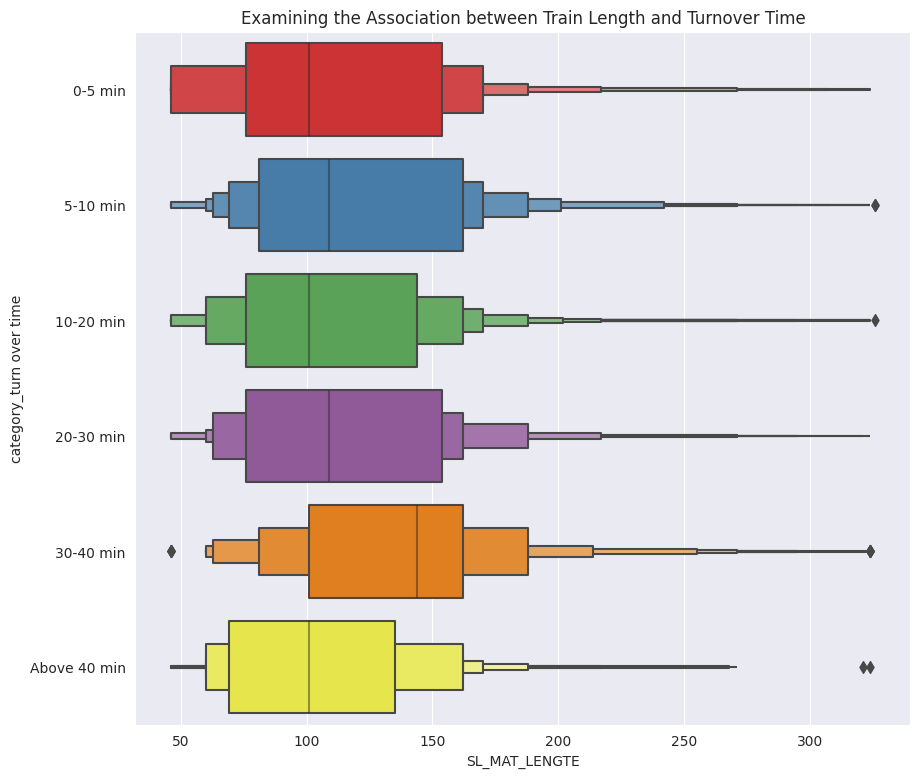

In [24]:
# Horizontal Boxen plot
sns.set_style("darkgrid")
plt.figure(figsize=(10,9))
sns.boxenplot(x = merged_data['SL_MAT_LENGTE'] ,y=merged_data['category_turn over time'] ,palette="Set1")
plt.title('Examining the Association between Train Length and Turnover Time')
plt.show()

###1.1.1 A nested grouping by two categorical variables (the turn over time and the length of the train with and without delay).

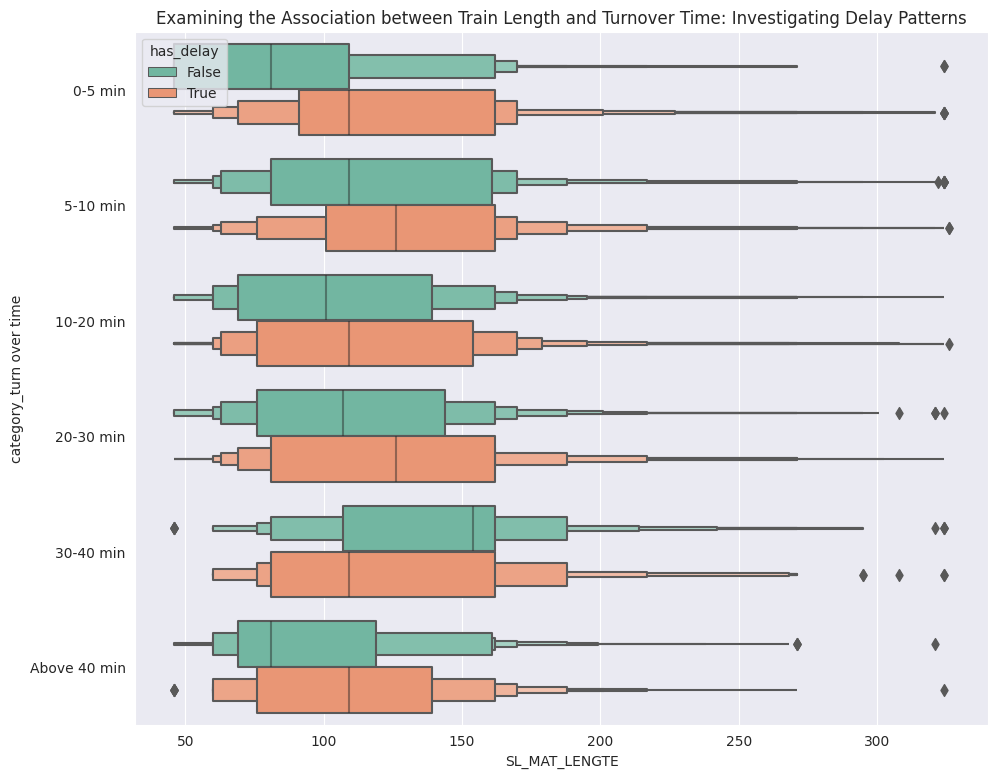

In [25]:
# Show groups with different colors using "hue" (Nested grouping by two categorical variables)
plt.figure(figsize=(11,9))
sns.boxenplot(x = merged_data['SL_MAT_LENGTE'] ,y=merged_data['category_turn over time'], hue=merged_data['has_delay'], palette="Set2")
plt.title('Examining the Association between Train Length and Turnover Time: Investigating Delay Patterns')
plt.show()

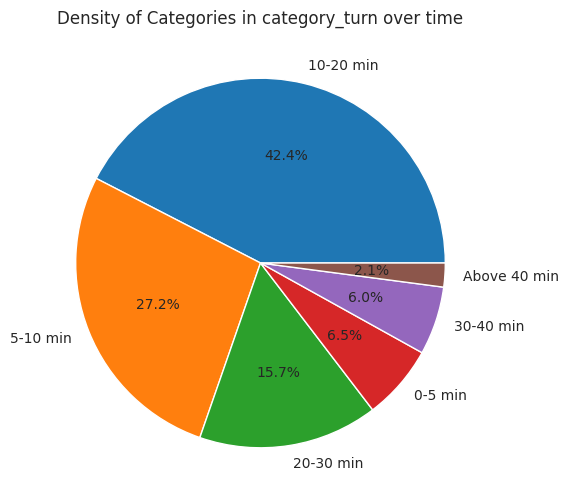

In [26]:
# Calculate the density of each category in the "category_turn over time" column
category_density = merged_data['category_turn over time'].value_counts(normalize=True)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_density, labels=category_density.index, autopct='%1.1f%%')
plt.title('Density of Categories in category_turn over time')
plt.show()

<ipython-input-27-8021f5f6836c>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data["turn over time_seconds"])


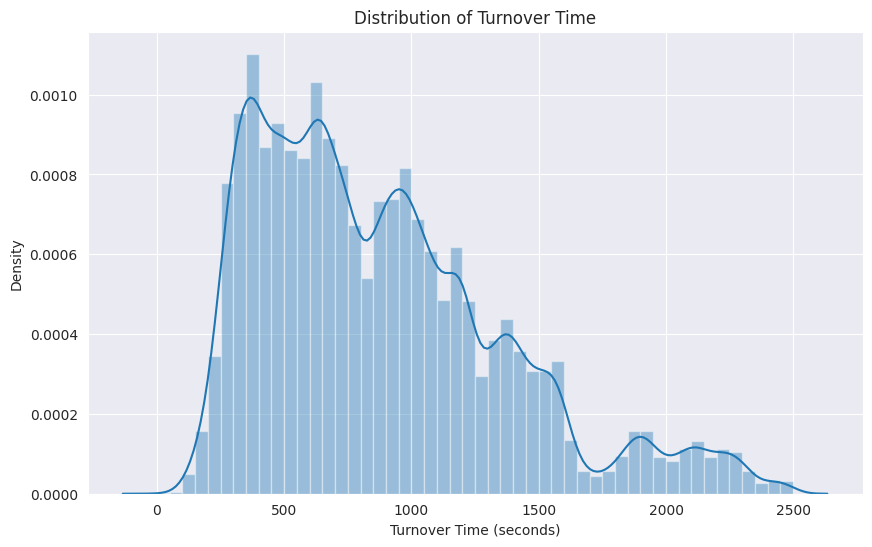

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data where turn over time_seconds values are less than 2500
filtered_data = merged_data[merged_data["turn over time_seconds"] < 2500]

# Create the distribution plot
plt.figure(figsize=(10, 6))
sns.distplot(filtered_data["turn over time_seconds"])
plt.xlabel("Turnover Time (seconds)")
plt.ylabel("Density")
plt.title("Distribution of Turnover Time")
plt.show()


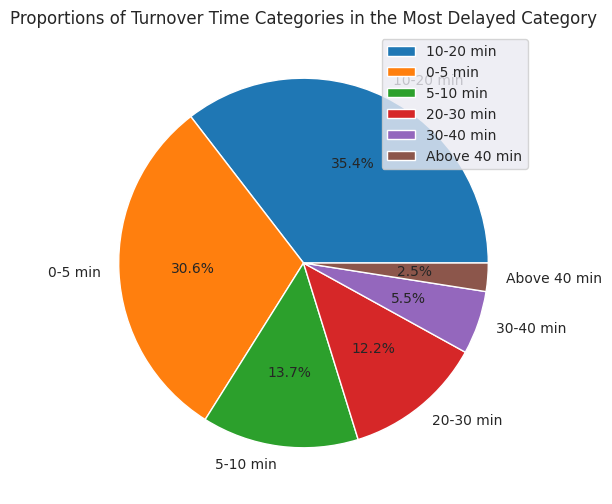

In [28]:
import matplotlib.pyplot as plt

# Apply the threshold condition and count the delays for each category
delay_counts = merged_data[merged_data["delay"] > 59]["category_turn over time"].value_counts()

# Find the category with the highest count of delays
category_with_most_delays = delay_counts.idxmax()

# Filter the data based on the category with the most delays
category_data = merged_data[merged_data["category_turn over time"] == category_with_most_delays]

# Calculate the count of each category in the "turn over time" column
turnover_counts = category_data["category_turn over time"].value_counts()

# Create a pie chart to visualize the proportions of each category in the "turn over time" column
plt.figure(figsize=(8, 6))
plt.pie(delay_counts, labels=turnover_counts.index, autopct="%1.1f%%")
plt.title("Proportions of Turnover Time Categories in the Most Delayed Category")
plt.legend()
plt.show()


<ipython-input-29-764fc2835e3b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_data['SL_MAT_LENGTE'])


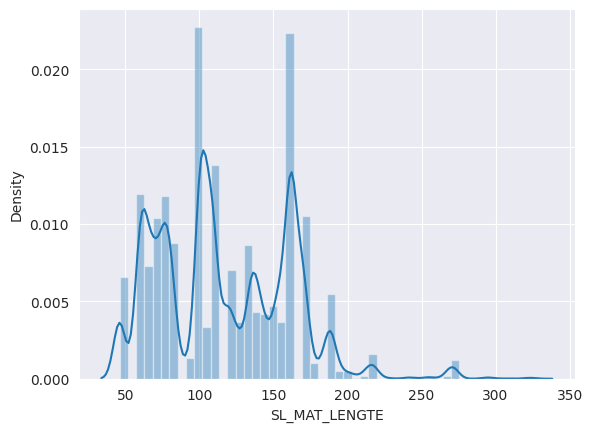

In [29]:
sns.distplot(filtered_data['SL_MAT_LENGTE'])
plt.show()

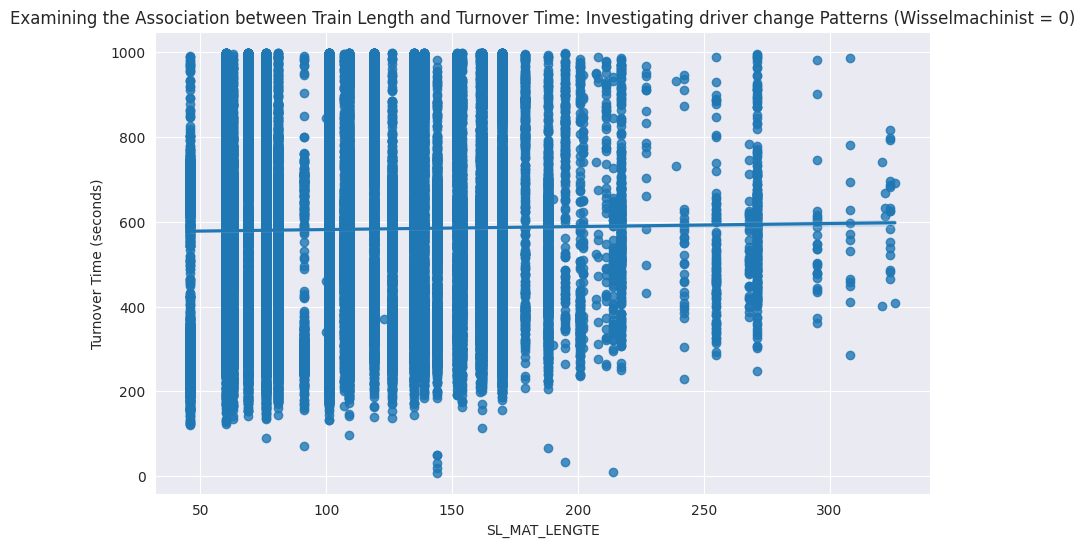

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data based on a specific value for Wisselmachinist
specific_value = 0
filtered_data = merged_data[merged_data["Wisselmachinist"] == specific_value]
filtered_data = filtered_data[filtered_data["turn over time_seconds"] < 1000]

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="SL_MAT_LENGTE", y="turn over time_seconds", data=filtered_data)
plt.xlabel("SL_MAT_LENGTE")
plt.ylabel("Turnover Time (seconds)")
plt.title(f"Examining the Association between Train Length and Turnover Time: Investigating driver change Patterns (Wisselmachinist = {specific_value})")
plt.show()


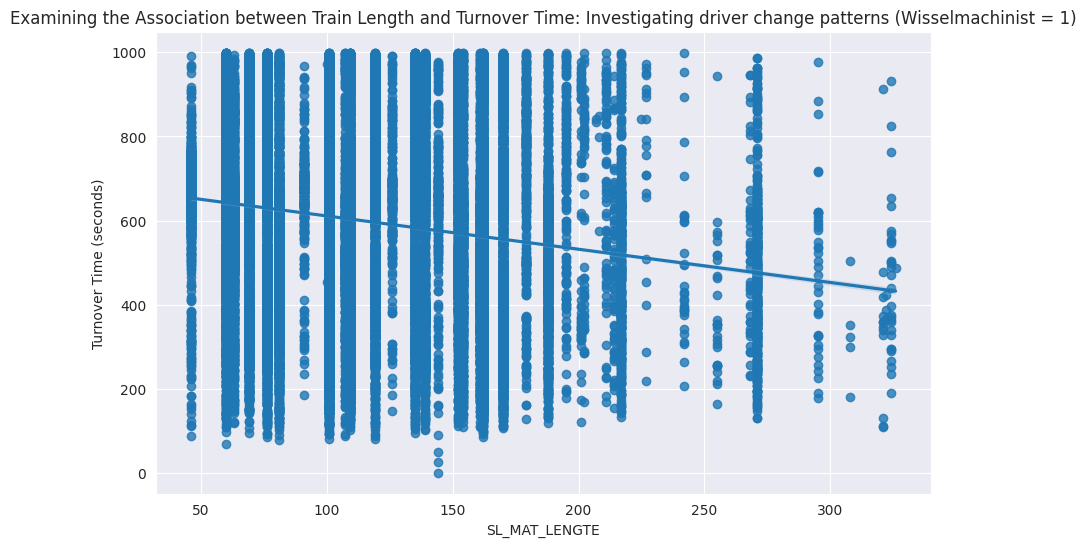

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data based on a specific value for Wisselmachinist
specific_value = 1
filtered_data = merged_data[merged_data["Wisselmachinist"] == specific_value]
filtered_data = filtered_data[filtered_data["turn over time_seconds"] < 1000]

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x="SL_MAT_LENGTE", y="turn over time_seconds", data=filtered_data)
plt.xlabel("SL_MAT_LENGTE")
plt.ylabel("Turnover Time (seconds)")
plt.title(f"Examining the Association between Train Length and Turnover Time: Investigating driver change patterns (Wisselmachinist = {specific_value})")
plt.show()


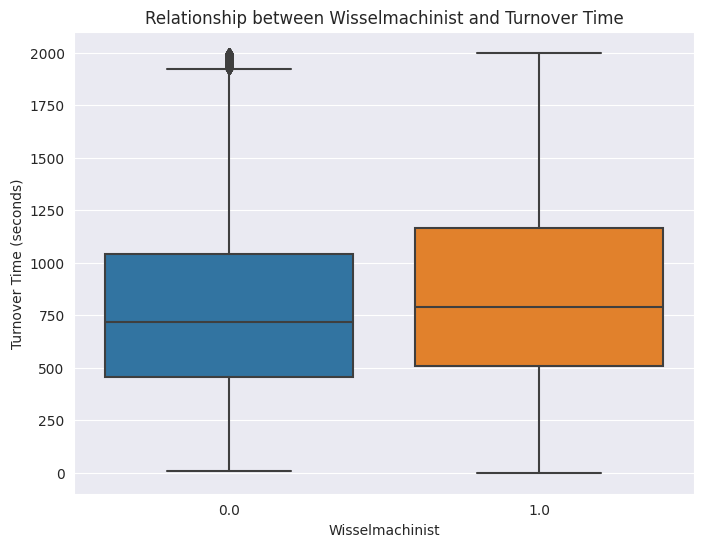

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data where turn over time_seconds values are less than 2000
filtered_data = merged_data[merged_data["turn over time_seconds"] < 2000]

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Wisselmachinist", y="turn over time_seconds", data=filtered_data)
plt.xlabel("Wisselmachinist")
plt.ylabel("Turnover Time (seconds)")
plt.title("Relationship between Wisselmachinist and Turnover Time")
plt.show()


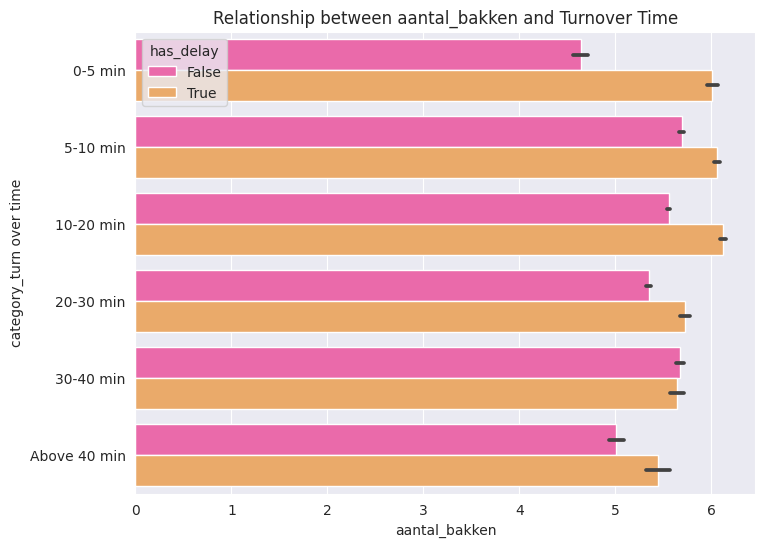

In [33]:
plt.figure(figsize=(8,6))
sns.barplot(x="aantal_bakken" , y="category_turn over time" ,hue="has_delay" , data=merged_data, palette="spring")
#plt.ylim(59,2500)
plt.title("Relationship between aantal_bakken and Turnover Time")
plt.show()

<ipython-input-34-e95c2ed6b823>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( merged_data["aantal_bakken"]  , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2))


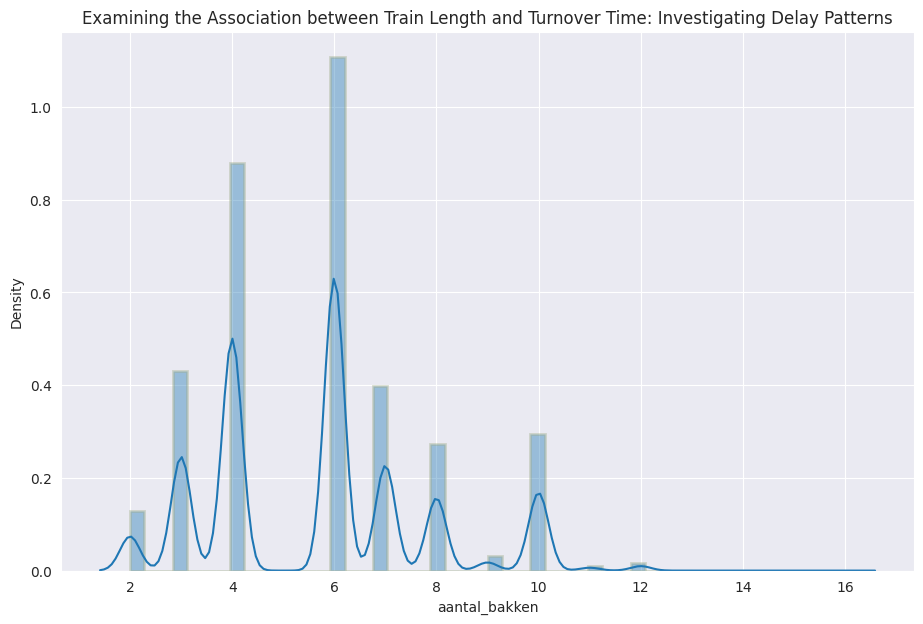

In [34]:
plt.figure(figsize=(11,7))
sns.distplot( merged_data["aantal_bakken"]  , hist_kws=dict(edgecolor = '#9dab86' ,linewidth=2))
#plt.xlim(59,5000)
plt.title('Examining the Association between Train Length and Turnover Time: Investigating Delay Patterns')
plt.show()

<ipython-input-35-c07340a6f537>:5: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x="matSoort" ,palette="Set1", y ="turn over time_seconds" , data=filtered_data, linewidth=1, size=6 ,jitter=.3)


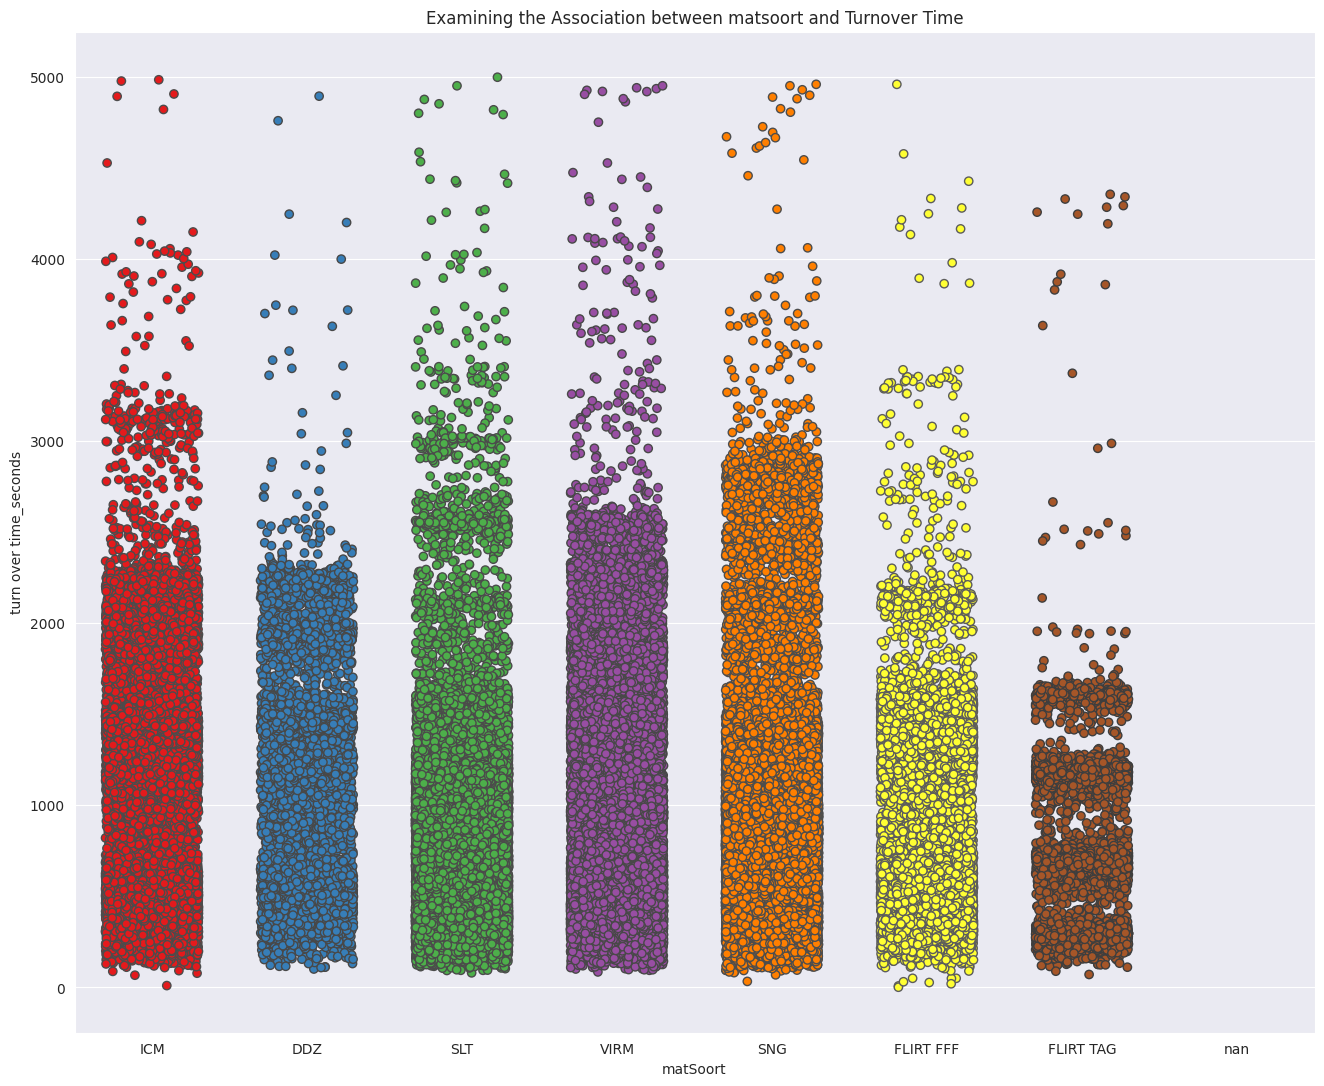

In [35]:
# Adjust the linewidth of the edges of the circles using "linewidth" parameter
# Adjust the size of the circles using the "size" parameter
filtered_data = merged_data[merged_data["turn over time_seconds"] < 5000]
plt.figure(figsize=(16,13))
sns.stripplot(x="matSoort" ,palette="Set1", y ="turn over time_seconds" , data=filtered_data, linewidth=1, size=6 ,jitter=.3)
plt.title('Examining the Association between matsoort and Turnover Time')
plt.show()

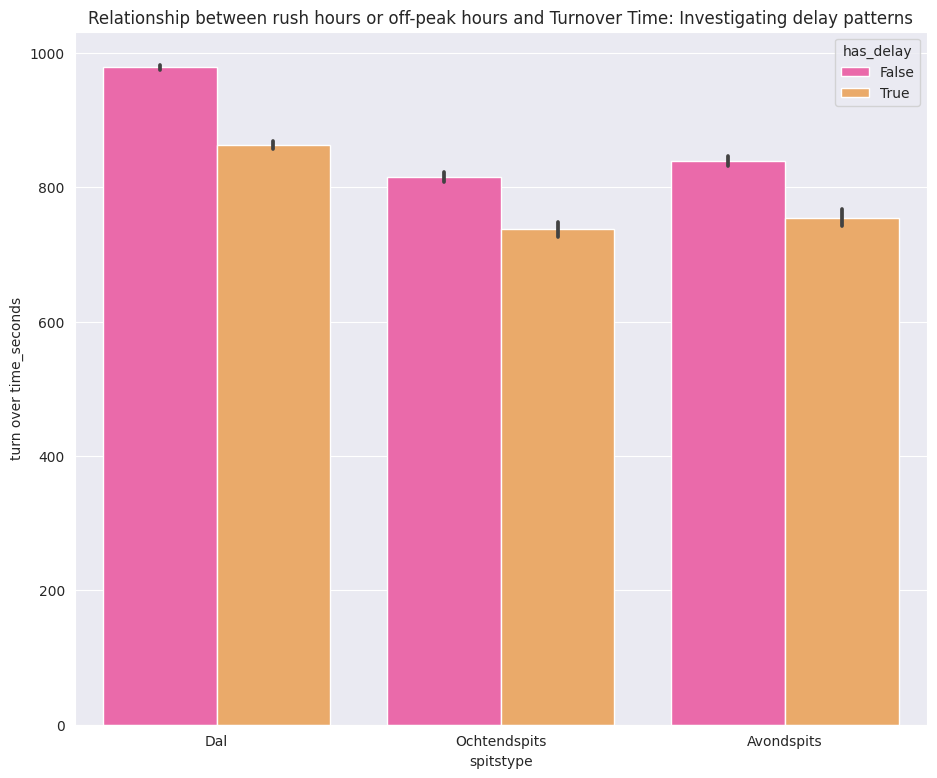

In [36]:
# Facet along the columns to show a categorical variable using "col" parameter
#filtered_data = merged_data[merged_data["turn over time_seconds"] < 2000]
#plt.figure(figsize=(11,9))
#sns.catplot(x="spitstype" , y = "turn over time_seconds", hue= "has_delay",col="Wisselmachinist", kind="violin",palette="Set3" , height=8, aspect=1 ,data=filtered_data , split = True , cut =0)
#plt.show()

plt.figure(figsize=(11,9))
filtered_data = merged_data[merged_data["turn over time_seconds"] < 5000]
sns.barplot(x="spitstype" , y="turn over time_seconds" ,hue="has_delay" , data=filtered_data, palette="spring")
plt.title("Relationship between rush hours or off-peak hours and Turnover Time: Investigating delay patterns")
plt.show()

#Apply Models

In [37]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier


# importing packages for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#importing lightgbm package
import lightgbm as lgb

##1.1 make a dataset with features are selected

In [38]:
#dropping the fields identified as not significant
merged_data_filtered=merged_data.drop(['act_uitvoertijdVolgend','SL_BASIC_UITVTIJD_VERTREK','SL_RIJRICHTINGKERING_IND','SL_OMNUMMERING','SL_TREINNR','SL_VERKEERSDATUM','bewegingcode','verkeersdatum','act_drglptVolgend', 'act_actSoortVolgend','turn over time',  'week'  , 'act_OplantijdVolgend', 'SL_OPLANTIJD_VERTREK','index','SL_DRGLPT','delay', 'category_turn over time', 'has_delay'],axis=1)
merged_data_filtered.info()
num_columns = merged_data_filtered.shape[1]
merged_data_filtered
#print("Number of columns:", num_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156710 entries, 0 to 156709
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SL_MAT_LENGTE           156710 non-null  float64
 1   Wisselmachinist         156697 non-null  float64
 2   spitstype               156710 non-null  object 
 3   matSoort                156705 non-null  object 
 4   aantal_bakken           156706 non-null  float64
 5   turn over time_seconds  156710 non-null  float64
dtypes: float64(4), object(2)
memory usage: 7.2+ MB


,SL_MAT_LENGTE,Wisselmachinist,spitstype,matSoort,aantal_bakken,turn over time_seconds
0,161.0,0.0,Dal,ICM,6.0,420.0
1,161.0,0.0,Dal,ICM,6.0,620.0
2,161.0,1.0,Dal,ICM,6.0,1865.0
3,188.0,0.0,Dal,ICM,7.0,711.0
4,154.0,0.0,Dal,DDZ,6.0,609.0
...,...,...,...,...,...,...
156705,101.0,0.0,Dal,SLT,6.0,2320.0
156706,101.0,1.0,Dal,SLT,6.0,842.0
156707,101.0,1.0,Dal,SLT,6.0,1236.0
156708,107.0,0.0,Dal,ICM,4.0,1417.0


###1.1.1 delete Null values

In [39]:
merged_data_filtered.dropna(subset=['Wisselmachinist'], inplace=True)
merged_data_filtered.dropna(subset=['aantal_bakken'], inplace=True)
merged_data_filtered.dropna(subset=['matSoort'], inplace=True)



In [40]:
null_counts = merged_data_filtered.isnull().sum()
print(null_counts)

SL_MAT_LENGTE             0
Wisselmachinist           0
spitstype                 0
matSoort                  0
aantal_bakken             0
turn over time_seconds    0
dtype: int64


In [41]:

new_column_order = ['SL_MAT_LENGTE', 'Wisselmachinist', 'matSoort', 'aantal_bakken','spitstype','turn over time_seconds']  # Specify the desired column order

# Reorder the columns in the DataFrame
merged_data_filtered = merged_data_filtered[new_column_order]
merged_data_filtered


,SL_MAT_LENGTE,Wisselmachinist,matSoort,aantal_bakken,spitstype,turn over time_seconds
0,161.0,0.0,ICM,6.0,Dal,420.0
1,161.0,0.0,ICM,6.0,Dal,620.0
2,161.0,1.0,ICM,6.0,Dal,1865.0
3,188.0,0.0,ICM,7.0,Dal,711.0
4,154.0,0.0,DDZ,6.0,Dal,609.0
...,...,...,...,...,...,...
156705,101.0,0.0,SLT,6.0,Dal,2320.0
156706,101.0,1.0,SLT,6.0,Dal,842.0
156707,101.0,1.0,SLT,6.0,Dal,1236.0
156708,107.0,0.0,ICM,4.0,Dal,1417.0


In [42]:
column_names = ['SL_MAT_LENGTE', 'Wisselmachinist', 'matSoort', 'aantal_bakken', 'spitstype', 'turn over time_seconds']  # Specify the column names for which you want to count non-null rows

non_null_counts = merged_data_filtered[column_names].count()
print(non_null_counts)

SL_MAT_LENGTE             156692
Wisselmachinist           156692
matSoort                  156692
aantal_bakken             156692
spitstype                 156692
turn over time_seconds    156692
dtype: int64


In [43]:
merged_data_filtered['spitstype'].value_counts()

Dal             119905
Avondspits       18857
Ochtendspits     17930
Name: spitstype, dtype: int64

In [44]:
merged_data_filtered.describe()

,SL_MAT_LENGTE,Wisselmachinist,aantal_bakken,turn over time_seconds
count,156692.000000,156692.000000,156692.000000,156692.000000
mean,116.304840,0.476878,5.665631,921.415343
std,44.589116,0.499467,2.145159,657.702987
min,46.000000,0.000000,2.000000,1.000000
25%,76.000000,0.000000,4.000000,496.000000
50%,109.000000,0.000000,6.000000,792.000000
75%,154.000000,1.000000,7.000000,1181.000000
max,326.000000,1.000000,16.000000,54551.000000


In [45]:
merged_data_filtered

,SL_MAT_LENGTE,Wisselmachinist,matSoort,aantal_bakken,spitstype,turn over time_seconds
0,161.0,0.0,ICM,6.0,Dal,420.0
1,161.0,0.0,ICM,6.0,Dal,620.0
2,161.0,1.0,ICM,6.0,Dal,1865.0
3,188.0,0.0,ICM,7.0,Dal,711.0
4,154.0,0.0,DDZ,6.0,Dal,609.0
...,...,...,...,...,...,...
156705,101.0,0.0,SLT,6.0,Dal,2320.0
156706,101.0,1.0,SLT,6.0,Dal,842.0
156707,101.0,1.0,SLT,6.0,Dal,1236.0
156708,107.0,0.0,ICM,4.0,Dal,1417.0


In [46]:
mapping = {'ICM': 0, 'DDZ': 1, 'SLT': 2, 'VIRM': 3, 'SNG': 4, 'FLIRT FFF':5, 'FLIRT TAG':6 }  # Replace with your specific mapping
merged_data_filtered['matSoort'] = merged_data_filtered['matSoort'].map(mapping)

mapping={'Dal': 0, 'Avondspits': 1, 'Ochtendspits': 2 }
merged_data_filtered['spitstype'] = merged_data_filtered['spitstype'].map(mapping)

In [47]:
merged_data_filtered['matSoort'].value_counts()

4    40769
2    40276
3    28812
5    18005
0    16385
6     6848
1     5597
Name: matSoort, dtype: int64

In [48]:
merged_data_filtered['spitstype'].value_counts()

0    119905
1     18857
2     17930
Name: spitstype, dtype: int64

In [49]:
print(merged_data_filtered[['matSoort', 'spitstype']].dtypes)

matSoort     int64
spitstype    int64
dtype: object


In [50]:
# Get the data types of columns in the dataset
column_types = merged_data_filtered.dtypes

# Print the data types
print(column_types)

SL_MAT_LENGTE             float64
Wisselmachinist           float64
matSoort                    int64
aantal_bakken             float64
spitstype                   int64
turn over time_seconds    float64
dtype: object


In [51]:
def z_norm(variable):
    variable = (variable - variable.mean()) / variable.std()
    return variable

merged_data_filtered['SL_MAT_LENGTE'] = z_norm(merged_data_filtered['SL_MAT_LENGTE'])
merged_data_filtered['Wisselmachinist'] = z_norm(merged_data_filtered['Wisselmachinist'])
merged_data_filtered['matSoort'] = z_norm(merged_data_filtered['matSoort'])
merged_data_filtered['aantal_bakken'] = z_norm(merged_data_filtered['aantal_bakken'])
merged_data_filtered['spitstype'] = z_norm(merged_data_filtered['spitstype'])
merged_data_filtered['turn over time_seconds'] = z_norm(merged_data_filtered['turn over time_seconds'])



print("SL_MAT_LENGTE - mean =", merged_data_filtered['SL_MAT_LENGTE'].mean(), "SD =", merged_data_filtered['SL_MAT_LENGTE'].std())
print("Wisselmachinist - mean =", merged_data_filtered['Wisselmachinist'].mean(), "SD =", merged_data_filtered['Wisselmachinist'].std())
print("matSoort - mean =", merged_data_filtered['matSoort'].mean(), "SD =", merged_data_filtered['matSoort'].std())
print("aantal_bakken - mean =", merged_data_filtered['aantal_bakken'].mean(), "SD =", merged_data_filtered['aantal_bakken'].std())
print("spitstype - mean =", merged_data_filtered['spitstype'].mean(), "SD =", merged_data_filtered['spitstype'].std())
print("turn over time_seconds - mean =", merged_data_filtered['turn over time_seconds'].mean(), "SD =", merged_data_filtered['turn over time_seconds'].std())

SL_MAT_LENGTE - mean = 1.596195357692513e-16 SD = 1.0
Wisselmachinist - mean = 8.089808290123419e-17 SD = 1.0000000000000004
matSoort - mean = 2.3942930365387697e-17 SD = 0.9999999999999996
aantal_bakken - mean = 7.346126362107589e-17 SD = 1.0000000000000002
spitstype - mean = -4.1355970631124205e-17 SD = 1.0
turn over time_seconds - mean = 5.4597136666528006e-17 SD = 0.9999999999999997


In [53]:
x=merged_data_filtered[['SL_MAT_LENGTE','Wisselmachinist', 'matSoort', 'aantal_bakken', 'spitstype']]
y=merged_data_filtered[['turn over time_seconds']]

In [54]:
x

,SL_MAT_LENGTE,Wisselmachinist,matSoort,aantal_bakken,spitstype
0,1.002378,-0.954775,-1.901712,0.155872,-0.517054
1,1.002378,-0.954775,-1.901712,0.155872,-0.517054
2,1.002378,1.047361,-1.901712,0.155872,-0.517054
3,1.607907,-0.954775,-1.901712,0.622037,-0.517054
4,0.845389,-0.954775,-1.263324,0.155872,-0.517054
...,...,...,...,...,...
156705,-0.343242,-0.954775,-0.624935,0.155872,-0.517054
156706,-0.343242,1.047361,-0.624935,0.155872,-0.517054
156707,-0.343242,1.047361,-0.624935,0.155872,-0.517054
156708,-0.208680,-0.954775,-1.901712,-0.776460,-0.517054


In [55]:
y

,turn over time_seconds
0,-0.762374
1,-0.458285
2,1.434667
3,-0.319925
4,-0.475010
...,...
156705,2.126468
156706,-0.120747
156707,0.478308
156708,0.753508


In [56]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [57]:
x_train

,SL_MAT_LENGTE,Wisselmachinist,matSoort,aantal_bakken,spitstype
42627,1.002378,1.047361,-1.901712,0.155872,-0.517054
63061,-0.163826,1.047361,0.013453,-0.776460,-0.517054
65892,-1.576726,-0.954775,1.928618,-1.708792,-0.517054
155348,-0.791782,-0.954775,1.290229,-0.776460,-0.517054
14336,-0.343242,-0.954775,-0.624935,0.155872,-0.517054
...,...,...,...,...,...
97653,0.800535,1.047361,0.651841,1.088203,2.444303
95953,-0.343242,-0.954775,-0.624935,0.155872,-0.517054
152332,0.800535,1.047361,0.651841,1.088203,-0.517054
117967,-1.195468,-0.954775,1.290229,-1.242626,-0.517054


In [58]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit (x_train, y_train)

LinearRegression()

In [59]:
y_pred = regressor.predict(x_test)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

MAE: 0.6476705670321525
R2 Score: 0.025675471248122306


In [60]:
mse = np.mean((y_test - y_pred) ** 2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [61]:
print("mse Score:", mse)

mse Score: turn over time_seconds    0.891939
dtype: float64


In [62]:
import statsmodels.api as sm

In [63]:
OS_model = sm.OLS(y_train, x_train)
results = OS_model.fit()

In [64]:
print(results.summary())

                                   OLS Regression Results                                  
Dep. Variable:     turn over time_seconds   R-squared (uncentered):                   0.025
Model:                                OLS   Adj. R-squared (uncentered):              0.025
Method:                     Least Squares   F-statistic:                              541.2
Date:                    Fri, 14 Jul 2023   Prob (F-statistic):                        0.00
Time:                            02:22:14   Log-Likelihood:                     -1.4905e+05
No. Observations:                  104461   AIC:                                  2.981e+05
Df Residuals:                      104456   BIC:                                  2.982e+05
Df Model:                               5                                                  
Covariance Type:                nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.9

In [65]:
mse2 = np.mean((y_test - y_pred) ** 2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [66]:
mse2

turn over time_seconds    0.891939
dtype: float64

In [ ]:
# Make predictions on training data

y_train_pred = results.predict(x_train)


# Calculate MSE of training data

mse_train = np.mean((y_train - y_train_pred) ** 2)

In [ ]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)  # alpha controls the regularization strength

lasso.fit(x_train, y_train)

In [54]:
# Get the coefficients

coefficients = lasso.coef_


# Identify the unimportant variables

unimportant_variables = x_train.columns[coefficients == 0]

In [55]:
unimportant_variables

Index([], dtype='object')

In [56]:
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso

import numpy as np

In [57]:
cv_scores = []
alpha_values = np.logspace(-4, 0, num=10)

for alpha in alpha_values:

    lasso = Lasso(alpha=alpha)

    scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

    cv_scores.append((-1) * scores.mean())  # Convert negative MSE to positive


# Select the best alpha

best_alpha = alpha_values[np.argmin(cv_scores)]


# Train the final model using the best alpha

lasso = Lasso(alpha=best_alpha)

lasso.fit(x_train, y_train)

Lasso(alpha=0.0001)

In [58]:
best_alpha

0.0001

In [59]:
# Get the coefficients

coefficients = lasso.coef_


# Identify the unimportant variables

unimportant_variables = x_train.columns[coefficients == 0]

In [60]:
unimportant_variables

Index([], dtype='object')

In [61]:
coefficients

array([  0.60801782, 123.43021377, -32.4689887 , -25.58485768,
       -82.32711541])

In [62]:
y_pred = lasso.predict(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

MAE: 425.97486133407534
R2 Score: 0.025675479633173293


In [66]:
OS_model = sm.OLS(y_train, x_train)
results_lasso = OS_model.fit()

In [68]:
print(results_lasso.summary())

                                   OLS Regression Results                                  
Dep. Variable:     turn over time_seconds   R-squared (uncentered):                   0.617
Model:                                OLS   Adj. R-squared (uncentered):              0.617
Method:                     Least Squares   F-statistic:                          3.368e+04
Date:                    Wed, 12 Jul 2023   Prob (F-statistic):                        0.00
Time:                            10:11:29   Log-Likelihood:                     -8.3348e+05
No. Observations:                  104461   AIC:                                  1.667e+06
Df Residuals:                      104456   BIC:                                  1.667e+06
Df Model:                               5                                                  
Covariance Type:                nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.9